In [44]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [45]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [46]:
# Initializing a dataframe which will store all the information
cities_weather_df = pd.DataFrame(cities)
cities_weather_df = cities_weather_df.rename({0:"City"},axis='columns')
cities_weather_df["Country"] = ""
cities_weather_df["Date"] = ""
cities_weather_df["Latitude"] = ""
cities_weather_df["Longitude"] = ""
cities_weather_df["Temperature"] = ""
cities_weather_df["Humidity"] = ""
cities_weather_df["Cloudiness"] = ""
cities_weather_df["Wind Speed"] = ""
cities_weather_df.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,jamestown,,,,,,,,
1,mastic beach,,,,,,,,
2,new norfolk,,,,,,,,
3,chabahar,,,,,,,,
4,atbasar,,,,,,,,


## Perform API Calls

In [47]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

params = {
    "APPID": api_key,
    "units": "Imperial",
    "q": ""
}
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather"


In [54]:
# Loop through the cities Dataframe and run a weather search for each city
for index, row in cities_weather_df.iterrows():

    # update address key value
    params["q"] = row["City"]

    # make request
    city_weather_url = requests.get(base_url, params)
    city_weather = city_weather_url.json()
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    # print(cities_lat_lng.url)
    
    print(f"\nProcessing record {index + 1} for city {row[0]}")
    print(base_url + "&APPID=" + params["APPID"] + "&units=" + params["units"] + "&q=" + params["q"])
    
    try:
        cities_weather_df.loc[index,"Country"] = city_weather["sys"]["country"]
        cities_weather_df.loc[index,"Date"] = city_weather["dt"]
        cities_weather_df.loc[index,"Latitude"] = city_weather["coord"]["lat"]
        cities_weather_df.loc[index,"Longitude"] = city_weather["coord"]["lon"]
        cities_weather_df.loc[index,"Temperature"] = city_weather["main"]["temp_max"]
        cities_weather_df.loc[index,"Humidity"] = city_weather["main"]["humidity"]
        cities_weather_df.loc[index,"Cloudiness"] = city_weather["clouds"]["all"]
        cities_weather_df.loc[index,"Wind Speed"] = city_weather["wind"]["speed"]
    except:
        cities_weather_df.loc[index,"Country"] = np.nan
        cities_weather_df.loc[index,"Date"] = np.nan
        cities_weather_df.loc[index,"Latitude"] = np.nan
        cities_weather_df.loc[index,"Longitude"] = np.nan
        cities_weather_df.loc[index,"Temperature"] = np.nan
        cities_weather_df.loc[index,"Humidity"] = np.nan
        cities_weather_df.loc[index,"Cloudiness"] = np.nan
        cities_weather_df.loc[index,"Wind Speed"] = np.nan
        print("City not found... skipping.")    


Processing record 1 for city jamestown
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=jamestown

Processing record 2 for city mastic beach
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=mastic beach

Processing record 3 for city new norfolk
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=new norfolk

Processing record 4 for city chabahar
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=chabahar

Processing record 5 for city atbasar
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=atbasar

Processing record 6 for city barrow
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=barrow

Processing record 7 for city lokosovo
http://api.openweathermap.org/data/2.5/weathe


Processing record 54 for city kaitangata
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=kaitangata

Processing record 55 for city clyde river
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=clyde river

Processing record 56 for city itarema
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=itarema

Processing record 57 for city hermanus
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=hermanus

Processing record 58 for city punta arenas
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=punta arenas

Processing record 59 for city masallatah
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=masallatah

Processing record 60 for city nuuk
http://api.openweathermap.org/da


Processing record 106 for city castro
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=castro

Processing record 107 for city henties bay
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=henties bay

Processing record 108 for city okha
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=okha

Processing record 109 for city payakumbuh
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=payakumbuh

Processing record 110 for city airai
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=airai

Processing record 111 for city mataura
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=mataura

Processing record 112 for city vostok
http://api.openweathermap.org/data/2.5/weather&APPID=


Processing record 159 for city serta
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=serta

Processing record 160 for city mogadishu
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=mogadishu

Processing record 161 for city kieta
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=kieta

Processing record 162 for city luxor
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=luxor

Processing record 163 for city husavik
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=husavik

Processing record 164 for city grand centre
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=grand centre
City not found... skipping.

Processing record 165 for city khatanga
http://api.openweatherm


Processing record 212 for city upernavik
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=upernavik

Processing record 213 for city srednekolymsk
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=srednekolymsk

Processing record 214 for city deputatskiy
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=deputatskiy

Processing record 215 for city hanmer springs
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=hanmer springs

Processing record 216 for city emerald
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=emerald

Processing record 217 for city sorland
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=sorland

Processing record 218 for city haines junction
http://a


Processing record 265 for city paka
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=paka

Processing record 266 for city wewak
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=wewak

Processing record 267 for city malindi
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=malindi

Processing record 268 for city bahile
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=bahile

Processing record 269 for city lipin bor
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=lipin bor

Processing record 270 for city palmerston north
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=palmerston north

Processing record 271 for city tshikapa
http://api.openweathermap.org/data/2.5/weat


Processing record 318 for city buraydah
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=buraydah

Processing record 319 for city miguel hidalgo
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=miguel hidalgo

Processing record 320 for city touros
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=touros

Processing record 321 for city saint-philippe
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=saint-philippe

Processing record 322 for city iqaluit
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=iqaluit

Processing record 323 for city isangel
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=isangel

Processing record 324 for city severnyy
http://api.openweathermap


Processing record 371 for city superior
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=superior

Processing record 372 for city alofi
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=alofi

Processing record 373 for city groningen
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=groningen

Processing record 374 for city nevel
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=nevel

Processing record 375 for city opuwo
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=opuwo

Processing record 376 for city sonoita
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=sonoita

Processing record 377 for city noyabrsk
http://api.openweathermap.org/data/2.5/weather&APPID=77459a


Processing record 424 for city arco
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=arco

Processing record 425 for city neiafu
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=neiafu

Processing record 426 for city qurbah
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=qurbah
City not found... skipping.

Processing record 427 for city bardiyah
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=bardiyah
City not found... skipping.

Processing record 428 for city sindand
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=sindand
City not found... skipping.

Processing record 429 for city barawe
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=barawe
City not found... sk


Processing record 476 for city timra
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=timra

Processing record 477 for city sotnikovo
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=sotnikovo

Processing record 478 for city pemba
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=pemba

Processing record 479 for city muros
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=muros

Processing record 480 for city zuenoula
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=zuenoula

Processing record 481 for city anadyr
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=anadyr

Processing record 482 for city cocorit
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6be


Processing record 530 for city ancud
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=ancud

Processing record 531 for city nishihara
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=nishihara

Processing record 532 for city tyup
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=tyup

Processing record 533 for city ketchikan
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=ketchikan

Processing record 534 for city warqla
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=warqla
City not found... skipping.

Processing record 535 for city yingzhong
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=yingzhong
City not found... skipping.

Processing record 536 for city hami
h


Processing record 582 for city rabaul
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=rabaul

Processing record 583 for city khash
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=khash

Processing record 584 for city zhemchuzhnyy
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=zhemchuzhnyy
City not found... skipping.

Processing record 585 for city puerto baquerizo moreno
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=puerto baquerizo moreno

Processing record 586 for city tabou
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=tabou

Processing record 587 for city azul
http://api.openweathermap.org/data/2.5/weather&APPID=77459a6beceb5c889039bd9b5a8a39ea&units=Imperial&q=azul

Processing record 588 for city salalah


In [64]:
# Cleanup data to remove cities for which response was not returned from Weather API
cities_weather_df = cities_weather_df.dropna()
cities_weather_df = cities_weather_df.reset_index()

In [66]:
# Visualize to confirm DataFrame is created correctly
cities_weather_df.head()

,index,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,0,jamestown,AU,1535641522,-33.21,138.6,49.5,98,88,9.33
1,1,mastic beach,US,1535639700,40.77,-72.85,84.92,70,1,10.29
2,2,new norfolk,AU,1535639400,-42.78,147.06,48.2,70,75,10.29
3,3,chabahar,IR,1535641686,25.29,60.65,84.15,97,88,10.78
4,4,atbasar,KZ,1535641687,51.81,68.36,61.29,63,32,7.87


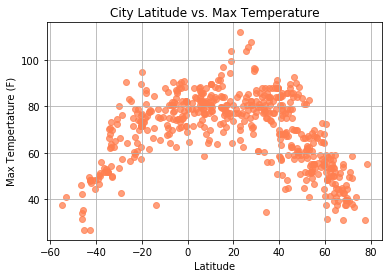

In [77]:
# Build the scatter plots
# Purposely used the color "coral" instead of "lightcoral" to match the output provided
plt.scatter(x=cities_weather_df["Latitude"],y=cities_weather_df["Temperature"],
            c="coral", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Tempertature (F)")
plt.grid()

# Save Figure
plt.savefig("../Images/LatitudevsMaxTemperature.png")


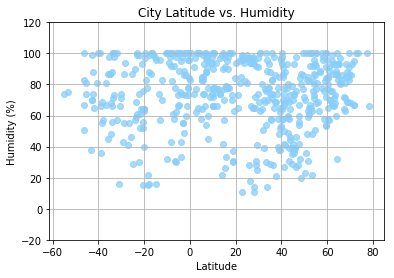

In [81]:
# Build the scatter plots
# Purposely used the color "coral" instead of "lightcoral" to match the output provided
plt.scatter(x=cities_weather_df["Latitude"],y=cities_weather_df["Humidity"],
            c="lightskyblue", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-20,120)
plt.grid()

# Save Figure
plt.savefig("../Images/LatitudevsHumidity.png")


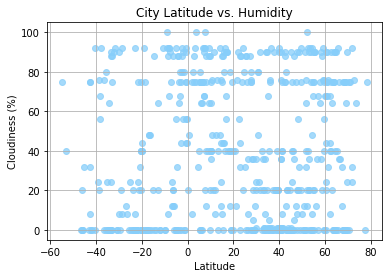

In [80]:
# Build the scatter plots
# Purposely used the color "coral" instead of "lightcoral" to match the output provided
plt.scatter(x=cities_weather_df["Latitude"],y=cities_weather_df["Cloudiness"],
            c="lightskyblue", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save Figure
plt.savefig("../Images/LatitudevsCloudiness.png")


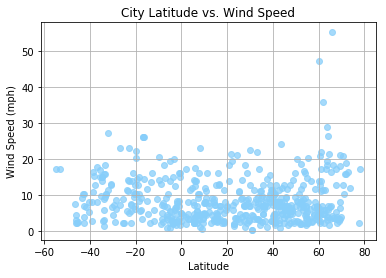

In [82]:
# Build the scatter plots
# Purposely used the color "coral" instead of "lightcoral" to match the output provided
plt.scatter(x=cities_weather_df["Latitude"],y=cities_weather_df["Wind Speed"],
            c="lightskyblue", alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save Figure
plt.savefig("../Images/LatitudevsWindSpeed.png")
